# KNN From Scratch (with Numpy)

## Setup

In [43]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
X1_train = np.array([1,2,3,4,5,6,7,8,9,10])
X2_train = np.array([7,6,8,1,2,2,8,7,0.5,1])
y_train = np.array([1, 1, 1, 0, 0, 0,1,1,0,0])

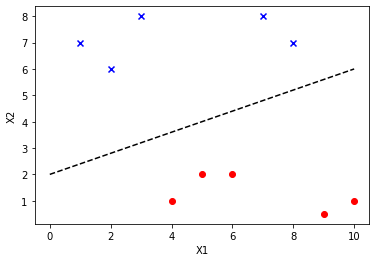

In [45]:
markers = ['o', 'x']  # 'o' for class 0, 'x' for class 1
colors = ['r', 'b']   # 'r' for class 0, 'b' for class 1

fig, ax = plt.subplots()

for i in range(len(y_train)):
    ax.scatter(X1_train[i], X2_train[i], c=colors[y_train[i]], marker=markers[y_train[i]])

ax.plot([0, 10], [2, 6], 'k--') 

ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

## The Algorithm

KNN is a non-parametric algorithm used for both regression and classification problems.

Intuitively, all this algorithm does is make a prediction based on the k closest observations (in terms of euclidian distance of the features).

<br/><br/>

**Steps:**

1 - choose k (the number of nearest neighbours that you will consider).

For each observation in the test set:

    2- Calculate the distance from the test set observation to every observation in the training set
    3- Choose the k training set observations which are closest to the test set observation
    4- Predict the label based on the k observations you have chosen (see voting mechanism below)

<br/><br/>

**Voting:**

- Classification = the algorithm considers the k nearest observations in the training set and classifies to the most common class of those k observations
- Regression = the algorithm considers the k nearest observations in the training set and predicts the mean of those observations

<br/><br/>

**Euclidian Distance:**

Formula:

$$ \text{Euclidian Distance} = \sqrt{ \sum_{i=0}^n{(x_{test, i}-x_{train, i})^2}} $$

Where n is number of dimensions (features). This would be caluclated for each test point against every possible training point, so that one can then find the k training set observations which are the closest each test point.

## Creating the class 

In [46]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        """Fit the model to the training data."""
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict_classification(self, X_test):
        """Make prediction for the test data. Classification data"""
        output = []
        
        for x in X_test: # for each observation in X_test
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train] # finding the distance to every node in xtrain
            k_nearest = np.argsort(distances)[:self.k] # selecting the closest k neighbours
            k_nearest_labels = [self.y_train[i] for i in k_nearest] # finding the corresponding label to the k nearst neighbours
            output.append(self.most_common_class(k_nearest_labels)) # store the prediction
        
        return np.array(output)
    
    def predict_regression(self, X_test):
        """Make prediction for the test data. Regression data"""
        output = []

        for x in X_test: # for each observation in X_test
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train] # finding the distance to every node in xtrain
            k_nearest = np.argsort(distances)[:self.k] # selecting the closest k neighbours
            k_nearest_labels = [self.y_train[i] for i in k_nearest] # finding the corresponding label to the k nearst neighbours
            output.append(np.mean(k_nearest_labels)) # store the prediction

        return np.array(output)
        
    def most_common_class(self, y_labs):
        label_counts = {}
        for label in y_labs:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        most_common_label = max(label_counts, key=label_counts.get)
        return most_common_label
    

## Testing it on a classification problem

In [48]:
X_train = np.vstack((X1_train, X2_train)).T

knn = KNN(k=3)
knn.fit(X_train, y_train)

X1_test = [2,4,5,7,9]
X2_test = [1,7,2.5,2,8]
X_test = np.vstack((X1_test, X2_test)).T
preds = knn.predict_classification(X_test)
print(preds)  # Output: [0, 1]

[0 1 0 0 1]


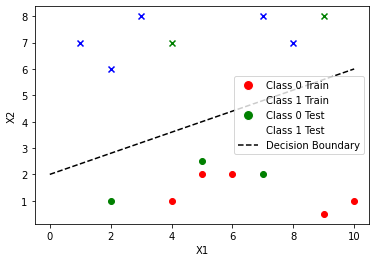

In [49]:
markers = ['o', 'x']  # 'o' for class 0, 'x' for class 1
colors = ['r', 'b']   # 'r' for class 0, 'b' for class 1

fig, ax = plt.subplots()

# Plot the training data
for i in range(len(y_train)):
    ax.scatter(X1_train[i], X2_train[i], c=colors[y_train[i]], marker=markers[y_train[i]])

# Plot the prediction data
for i in range(len(preds)):
    ax.scatter(X1_test[i], X2_test[i], c='g', marker=markers[preds[i]])

# Plot the decision boundary
ax.plot([0, 10], [2, 6], 'k--') 

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Create custom legend handles
from matplotlib.lines import Line2D

legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Class 0 Train'),
    Line2D([0], [0], marker='x', color='w', markerfacecolor='b', markersize=10, label='Class 1 Train'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Class 0 Test'),
    Line2D([0], [0], marker='x', color='w', markerfacecolor='g', markersize=10, label='Class 1 Test'),
    Line2D([0], [0], linestyle='--', color='k', label='Decision Boundary')
]

# Add legend
ax.legend(handles=legend_handles)

# Show plot
plt.show()


## Testing it on a regression problem

In [50]:
X1_train_reg = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_train_reg = np.array([0,1,2,3,4,5,4,3,2,1,0])

knn_reg = KNN(k=2)
knn_reg.fit(X1_train_reg, y_train_reg)

# 1D test data
X1_test = np.array([2, 4, 5, 7, 9]).reshape(-1, 1)
preds = knn_reg.predict_regression(X1_test)
print(preds)  # Output: [0, 1]

[1.5 3.5 4.5 3.5 1.5]


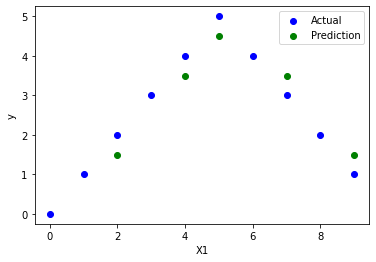

In [51]:
fig, ax = plt.subplots()

for i in range(len(y_train)):
    ax.scatter(X1_train_reg[i], y_train_reg[i], color = 'b',  label="Actual" if i == 0 else "")
for i in range(len(X1_test)):
    ax.scatter(X1_test[i], preds[i], color = 'g', label = 'Prediction' if i == 0 else "")


ax.set_xlabel('X1')
ax.set_ylabel('y')

ax.legend()

plt.show()

## That's all!

Now we can see that the model is making reasonable predictions on the unseen data, we know that the job here is done!